In [3]:
from PIL import Image
import numpy as np
import glob

Images= []
Labels= []
train_lbls=[]
train_imgs= []

#the dataset Path  
directory = r"#Paste the dataset Path here\trainingSet/"



def Load_data(directory):
    i=0
    x=0
    count= 0
    #Loading images in each file 0-9 in a numoy array to be used by Keras model later 
    for i in range(10):
        print("Loading data of dataset file " + str(i))
        #getting all image paths in each file in (fn) 
        fn=glob.glob(directory+str(i)+"/*.jpg")
        for x in fn :
            #1-opening each image from file pathes in (fn) using Image from pillow library 
            #2-appending each file 0-9 of index(i) into a numoy array
            #3-getting the number of images in each file in (count) 
            img=Image.open(x)
            imgs=np.array(img)
            count+=1
            Images.append(np.array(imgs))
        
        for j in range(count):
            #using the (count and index of file(i)) to assign each image in each file to its right label
            #appending labels of each file in array Labels 
            Labels.append(i)
            
        count = 0
    #finally getting all the images in numpy array train_imgs
    #and all labels in numpy array train_lbls
    train_imgs=np.array(Images)
    train_lbls=np.array(Labels)
    print("All Data is loaded Successfully")
    return train_imgs , train_lbls


       
     
train_imgs,train_lbls=Load_data(directory)

#printing the shape for debugging only
# print(train_imgs.shape)
# print(train_lbls.shape)



Loading data of dataset file 0
Loading data of dataset file 1
Loading data of dataset file 2
Loading data of dataset file 3
Loading data of dataset file 4
Loading data of dataset file 5
Loading data of dataset file 6
Loading data of dataset file 7
Loading data of dataset file 8
Loading data of dataset file 9
All Data is loaded Successfully


In [4]:
#normalizing images to have a value from -0.5 to 0.5 instead from 0 to 255 
#to be easy in calculations and for faster and better results 
train_imgs = (train_imgs / 255) - 0.5
#adding a 3rd dimension to be used in keras model 
train_imgs = np.expand_dims(train_imgs,axis=3)

#print for checking the 3rd dimension is added
print(train_imgs.shape)


    

(42000, 28, 28, 1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
1313/1313 [==============================] - 6s 5ms/step - loss: 0.6810A:  - ETA: 0s - loss
Epoch 2/4
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2339
Epoch 3/4
1313/1313 [==============================] - 6s 5ms/step

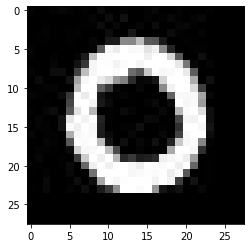

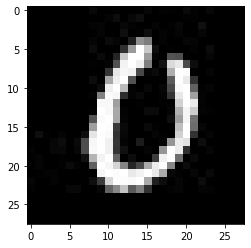

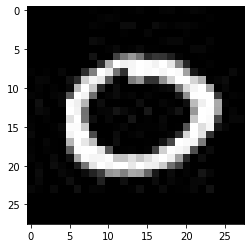

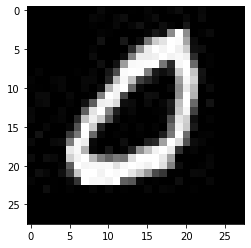

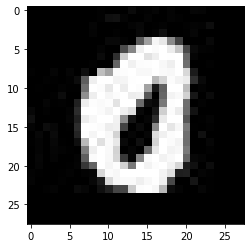

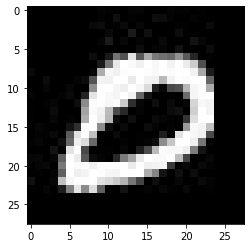

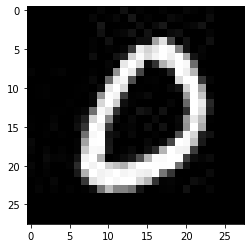

First 7 True labels in the trainingSet :[0 0 0 0 0 0 0]
First 7 Predicted image Labels    :[0 0 0 0 0 0 0]


In [5]:
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def Train(train_imgs,train_lbls):
    #hyperparameters
    num_filters= 8
    filter_size= 3
    pool_size= 2
    #creating the model
    model = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),MaxPooling2D(pool_size=pool_size),
    Flatten(),Dense(10, activation='softmax'),])
    model.compile(loss='categorical_crossentropy',optimizer='adam',)
    #printing the model summary to check layers are correct
    model.summary()
    
    #training the model 
    #to categorical is used 
    #because keras converts the array to one hot vectors instead of int
    model.fit(train_imgs,to_categorical(train_lbls),epochs=4,)
    
    #saving the model to be loaded later in the Predict function
    #so that when we need it we don't train the model again    
    model.save_weights('cnn.h5')
    
    #Prediction of first 7 images in the trainingSet vs the True trainingSet Labels
    p = model.predict(train_imgs[:7])
    
    #printing the first 7 images themselves
    print("The First 7 images:")
    fp=glob.glob(directory+"0/*.jpg")
    for i in range(7):
        img=Image.open(fp[i])
        imgplot = plt.imshow(img, cmap="gray")
        plt.show()
    
    print("First 7 True labels in the trainingSet :"+str(train_lbls[:7])) #first 7 images are images of 0s Label
    print("First 7 Predicted image Labels    :"+str(np.argmax(p, axis=1))) #predict should be 7 0s
    
    
Train(train_imgs,train_lbls)    
    
    
    

In [6]:
#given any image file path the function can predict the label of the image

# image_path="Write the image path here"
image_path=directory+"6/img_1704.jpg"  #random image of number 6 

def Predict(image_path):
    
    Pimg=[]
    #Create the model
    #set the hyperparameters
    num_filters = 8
    filter_size = 3
    pool_size = 2
    model = Sequential([Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),MaxPooling2D(pool_size=pool_size),
    Flatten(),Dense(10, activation='softmax'),])
    
    #load the .h5 model 
    model.load_weights('cnn.h5')
    
    #Load Image from the file path, load in numpy array ,expand the dimensions for keras
    
    img=Image.open(image_path)
    imgs=np.array(img)
    Pimg.append(imgs)
    Pimg=np.array(Pimg)
    Pimg=np.expand_dims(Pimg, axis=3)
    #predict
    Plbl=model.predict(Pimg[:1]) 
    print(np.argmax(Plbl, axis=1)) #printed label should be 6 
    
  
Predict(image_path)    
    
    
    

[6]
